<a href="https://colab.research.google.com/github/fauzan123ae/Kelompok2PolynomialData/blob/main/REGRESI_POLINOMIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
Polynomial Degree     : 4
R² Score              : 0.9974


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


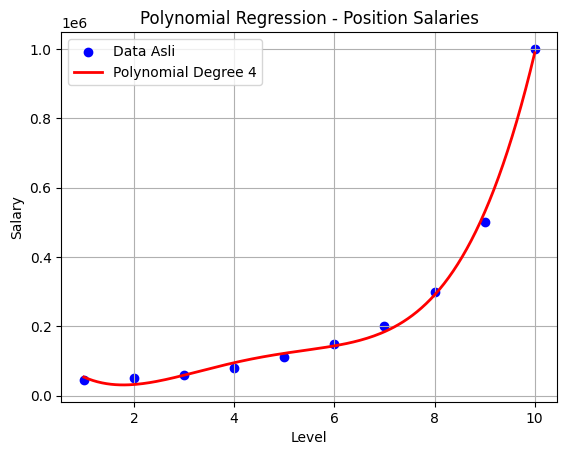


Prediksi gaji untuk level ini = 158,862.45


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score



df = pd.read_csv("Position_Salaries.csv")

# Cek data
print(df.head())

# Fitur
X = df[['Level']]        # shape: (n,1)
y = df['Salary']         # shape: (n,)

# Ubah y ke array
y = y.values


degree = 4   # Anda bisa ubah ke 2, 3, 5, dst

model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('linear', LinearRegression())
])

# Train model
model.fit(X, y)


# Membuat data X baru untuk plotting kurva halus
X_grid = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_pred_curve = model.predict(X_grid)

# Prediksi training data
y_pred_train = model.predict(X)


r2 = r2_score(y, y_pred_train)
print("================================================")
print(f"Polynomial Degree     : {degree}")
print(f"R² Score              : {r2:.4f}")
print("================================================")



plt.scatter(X, y, color='blue', label='Data Asli')
plt.plot(X_grid, y_pred_curve, color='red', linewidth=2, label=f'Polynomial Degree {degree}')

plt.title("Polynomial Regression - Position Salaries")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()



contoh_level = np.array([[6.5]])
contoh_prediksi = model.predict(contoh_level)
print(f"\nPrediksi gaji untuk level ini = {contoh_prediksi[0]:,.2f}")
